# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:*Emmanuel Owusu-Ampaw* \
**Email:*eo2361@nyu.edu*

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

In [1]:
#Todo

# 1. Generalization to new speakers
# I will split the dataset by speaker, not by individual recordings.
# For example:
#   - Train: 80 speakers
#   - Validation: 10 speakers
#   - Test: 10 speakers
# Each speaker’s full set of recordings (all 5 days) appears in only one split.

# Reasoning:
# This prevents the model from memorizing speaker-specific features.
# By holding out entire speakers, the model must learn voice-independent patterns,
# which ensures it generalizes to new speakers it has never heard before.

# 2. Kilian’s additional 10,000 recordings
# Objective: perform well on Kilian while still generalizing to other speakers.

# Strategy:
# - Keep the original speaker-level split for the 100-person dataset unchanged.
# - Create a separate Kilian dataset split:
#     Kilian-train: 60%
#     Kilian-val: 20%
#     Kilian-test: 20%
# - Train a base model on the original 80 training speakers.
# - Fine-tune the model on Kilian-train (using a small learning rate or adaptation technique).
# - Validate and test on:
#     (a) Original test speakers → to measure generalization.
#     (b) Kilian-test → to measure personalized performance.

# Reasoning:
# This avoids mixing Kilian’s data with the main dataset,
# keeps a fair test for unseen speakers, and still allows adaptation for Kilian.


### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


In [2]:
#Todo
# 1. 1-NN Classification
# Positive points: (1,2), (1,4), (5,4)
# Negative points: (3,1), (3,2)
# 
# In 1-NN, each new point is assigned the label of its nearest neighbor.
# The decision boundary is formed by perpendicular bisectors between
# neighboring opposite-class points (a Voronoi-style partition of the plane).
#
# Example: a point near (2,2) will be closest to (3,2) → Negative,
# while a point near (1,3) will be closest to (1,2) or (1,4) → Positive.
# So the boundary curves roughly midway between the clusters of positives and negatives.

# 2. Feature Scaling
# Dataset:
#   Positive: (100,2), (100,4), (500,4)
#   Negative: (300,1), (300,2)
# Query: (500,1)
#
# Before scaling:
#   Distance to (500,4) = 3   → Positive
#   Distance to (300,1) = 200 → Negative
#   → Closest = (500,4) → Classified as Positive
#
# After scaling each feature to [0,1]:
#   x_min=100, x_max=500 → scaled_x = (x - 100)/400
#   y_min=1,   y_max=4   → scaled_y = (y - 1)/3
#
#   (500,1) → (1,0)
#   (300,1) → (0.5,0)
#   (500,4) → (1,1)
#   Distances:
#       to (300,1): sqrt((1-0.5)^2 + (0-0)^2) = 0.5
#       to (500,4): sqrt((1-1)^2 + (0-1)^2) = 1.0
#   → Closest = (300,1) → Classified as Negative
#
# Therefore:
#   Before scaling → Positive
#   After scaling  → Negative
# Feature scaling changes which dimension dominates distance computations.

# 3. Handling Missing Values
# If some features of a test point are missing:
#   - Compute distance using only the features that are present for both points.
#   - Optionally normalize by the number of observed features:
#       d(x,z) = sqrt( (1/|obs|) * Σ_{j∈observed} (x_j - z_j)^2 )
#   - Alternatively, impute missing features with mean/median or nearest-neighbor averages.
# This way, missing values don’t break distance computation.

# 4. High-dimensional Data
# K-NN can still perform well on images because:
#   - Even though images have thousands of pixels, similar images lie on
#     low-dimensional manifolds within that space (structured patterns).
#   - When using learned embeddings (e.g., CNN features) instead of raw pixels,
#     distances become meaningful again.
#   - K-NN simply needs a good feature representation where similar classes
#     are close together—then nearest neighbors are likely of the same class.


### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

In [3]:
#Todo
# 1. Evaluating h(x) = sign(w · x) on D_TR and D_TE
# Yes — this directly helps compare the model’s performance on training vs test data.
# For each (x, y) in D_TR (training set) and D_TE (test set):
#   - Compute h(x) = sign(w · x)
#   - Compare h(x) to the true label y
# The fraction of incorrect predictions gives the empirical error rate.
# By comparing the two error rates, we can determine if the test error is higher than the training error.
# If test error > training error, it indicates possible overfitting.

# 2. Why there’s no need to compute training error explicitly
# In the standard Perceptron algorithm on linearly separable data:
#   - The model updates weights only when a training point is misclassified.
#   - When the algorithm converges, it means it can classify all training points correctly.
# Therefore, once convergence is reached:
#   → Training error = 0 automatically.
# There is no need to compute it explicitly since the algorithm’s stopping condition already ensures perfect classification on the training set.


### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [4]:
# Todo
# Data:
#   Positive: (10, -2)  with y = +1
#   Negative: (12,  2)  with y = -1
# Start: w0 = (0, 0), learning rate η = 1
# Update rule: w <- w + y * x whenever y * (w · x) <= 0

# First few updates (cycling through points in order):

# Step 1: use (10, -2), y = +1
#   w0 · x = 0  → misclassified (y * 0 <= 0)
#   w1 = w0 + 1 * (10, -2) = (10, -2)

# Step 2: use (12, 2), y = -1
#   w1 · x = 10*12 + (-2)*2 = 116
#   y * (w1 · x) = -1 * 116 < 0 → misclassified
#   w2 = w1 + (-1) * (12, 2) = (10, -2) - (12, 2) = (-2, -4)

# Next pass:

# Step 3: (10, -2), y = +1
#   w2 · x = (-2)*10 + (-4)*(-2) = -20 + 8 = -12
#   y * (w2 · x) = -12 <= 0 → misclassified
#   w3 = w2 + (10, -2) = (8, -6)

# Step 4: (12, 2), y = -1
#   w3 · x = 8*12 + (-6)*2 = 96 - 12 = 84
#   y * (w3 · x) = -84 < 0 → misclassified
#   w4 = w3 - (12, 2) = (-4, -8)

# We see the weights keep changing:
#   (0, 0) → (10, -2) → (-2, -4) → (8, -6) → (-4, -8) → ...

# Check separability:
#   For correct classification we need:
#     10*w1 - 2*w2 > 0   (positive point)
#     12*w1 + 2*w2 < 0   (negative point)
#   Adding:
#     (10*w1 - 2*w2) + (12*w1 + 2*w2) = 22*w1
#     gives 22*w1 > 0 and 22*w1 < 0 simultaneously → impossible.
#
# So there is NO linear separator through the origin that correctly
# classifies both points. The dataset (with no bias term) is not linearly separable.

# Conclusion:
# - The Perceptron will never converge on this dataset.
# - Number of updates until convergence: infinite (does not converge).
# - The sequence of w_i keeps oscillating and growing in magnitude instead of stabilizing.


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [5]:
#Todo
# We start with w0 = (0, 0, 0, 0, 0) and use:
#   w <- w + (count) * y * x

# 1) (0, 0, 0, 0, 4), y = +1, count = 2
#    Δw = 2 * (+1) * (0, 0, 0, 0, 4) = (0, 0, 0, 0, 8)
#    w = (0, 0, 0, 0, 8)

# 2) (0, 0, 6, 5, 0), y = +1, count = 1
#    Δw = (0, 0, 6, 5, 0)
#    w = (0, 0, 6, 5, 8)

# 3) (3, 0, 0, 0, 0), y = -1, count = 1
#    Δw = (-1) * (3, 0, 0, 0, 0) = (-3, 0, 0, 0, 0)
#    w = (-3, 0, 6, 5, 8)

# 4) (0, 9, 3, 6, 0), y = -1, count = 1
#    Δw = (-1) * (0, 9, 3, 6, 0) = (0, -9, -3, -6, 0)
#    w = (-3, -9, 3, -1, 8)

# 5) (0, 1, 0, 2, 5), y = -1, count = 1
#    Δw = (-1) * (0, 1, 0, 2, 5) = (0, -1, 0, -2, -5)
#    w = (-3, -10, 3, -3, 3)

# Final weight vector:
w_final = (-3, -10, 3, -3, 3)
w_final


(-3, -10, 3, -3, 3)

### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

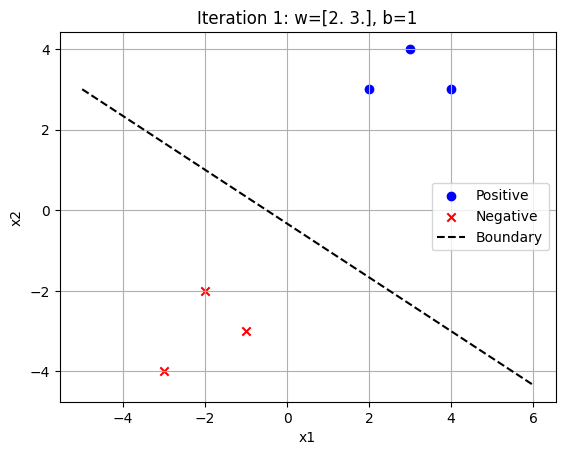

Final weight vector: [2. 3.]
Final bias: 1
Total updates: 1


In [6]:
#Todo
# Let's visualize Perceptron convergence on a small linearly separable dataset.
import numpy as np
import matplotlib.pyplot as plt

# Create a simple 2D dataset
X = np.array([
    [2, 3], [3, 4], [4, 3],    # Positive points
    [-1, -3], [-2, -2], [-3, -4]  # Negative points
])
y = np.array([1, 1, 1, -1, -1, -1])

# Initialize weights and learning rate
w = np.zeros(2)
b = 0
lr = 1

# Function to plot the data and decision boundary
def plot_decision_boundary(w, b, iteration):
    plt.figure()
    # Plot data points
    for i in range(len(X)):
        if y[i] == 1:
            plt.scatter(X[i,0], X[i,1], color='blue', marker='o', label='Positive' if i==0 else "")
        else:
            plt.scatter(X[i,0], X[i,1], color='red', marker='x', label='Negative' if i==3 else "")
    
    # Plot decision boundary: w1*x + w2*y + b = 0
    x_vals = np.linspace(-5, 6, 100)
    if w[1] != 0:
        y_vals = -(w[0]*x_vals + b)/w[1]
        plt.plot(x_vals, y_vals, 'k--', label='Boundary')
    
    plt.title(f'Iteration {iteration}: w={np.round(w,2)}, b={np.round(b,2)}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Perceptron training loop
iteration = 0
for epoch in range(10):  # limit iterations for visualization
    error_count = 0
    for i in range(len(X)):
        if y[i] * (np.dot(w, X[i]) + b) <= 0:
            w += lr * y[i] * X[i]
            b += lr * y[i]
            iteration += 1
            error_count += 1
            plot_decision_boundary(w, b, iteration)
    if error_count == 0:
        break

# Final output
print("Final weight vector:", w)
print("Final bias:", b)
print("Total updates:", iteration)
